# Data Preparation
**Author: Jaclyn Dwyer**

**Project Goal**: To help Kaiser Permanente determine how to identify areas that need higher level NICUs, the goal of this project is to predict the percentage of low birth weight (LBW) births in California census tracts based off their population characteristics and environmental health hazards.

## Overview

The data was obtained from California Communities Environmental Health Screening Tool reports (CalEnviroScreen) released by the Office of Environmental Health Hazard Assessment (OEHHA). These reports aim to identify California census tracts that are burdened and vulnerable to multiple pollution sources by looking at features including environmental pollution levels and population characteristics. Three different datasets are cleaned and used for this project including the the [CalEnviroScreen 3.0 report](https://oehha.ca.gov/calenviroscreen/report/calenviroscreen-30), the [demographic profile for the CalEnrivoScreen 3.0 report](https://oehha.ca.gov/calenviroscreen/report/calenviroscreen-30), and the [CalEnviroSreen 2.0 report](https://oehha.ca.gov/calenviroscreen/report/calenviroscreen-version-20). The CalEnviroScreen 3.0 report is the main data used for this project, while the other data sets are used to help achieve accurate predictions. This notebook outlines the process of data cleaning used for each data set. 

In [1]:
#import libraries
import pandas as pd
pd.set_option('display.max_columns', 100)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy import stats

In [2]:
#read in data
df2 = pd.read_csv('data/ces2results/CES_2.csv', index_col = 'Census Tract')

df3 = pd.read_csv('data/ces3results/CES_3.csv', index_col = 'Census Tract')

dp3 = pd.read_csv('data/ces3results/demographic_profile_3.csv', index_col = 'Census Tract ')

## CalEnviroScreen 3.0 Report (CES 3.0)

The main data source used for this project comes from the [CalEnviroScreen 3.0 Report](https://oehha.ca.gov/calenviroscreen/report/calenviroscreen-30) which was published in 2018. This data set is used to look at environmental health hazards and population characteristics.

In [3]:
df3.head(2)

,Total Population,California County,ZIP,Nearby City \n(to help approximate location only),Longitude,Latitude,CES 3.0 Score,CES 3.0 Percentile,CES 3.0 \nPercentile Range,SB 535 Disadvantaged Community,Ozone,Ozone Pctl,PM2.5,PM2.5 Pctl,Diesel PM,Diesel PM Pctl,Drinking Water,Drinking Water Pctl,Pesticides,Pesticides Pctl,Tox. Release,Tox. Release Pctl,Traffic,Traffic Pctl,Cleanup Sites,Cleanup Sites Pctl,Groundwater Threats,Groundwater Threats Pctl,Haz. Waste,Haz. Waste Pctl,Imp. Water Bodies,Imp. Water Bodies Pctl,Solid Waste,Solid Waste Pctl,Pollution Burden,Pollution Burden Score,Pollution Burden Pctl,Asthma,Asthma Pctl,Low Birth Weight,Low Birth Weight Pctl,Cardiovascular Disease,Cardiovascular Disease Pctl,Education,Education Pctl,Linguistic Isolation,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
Census Tract,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6019001100,3174,Fresno,93706,Fresno,-119.781696,36.709695,94.09,100.00,95-100% (highest scores),Yes,0.065,98.18,15.40,97.22,48.524,95.54,681.20,80.92,2.75,47.82,18551.957190,97.46,909.14,62.98,80.5,98.67,45.75,89.85,0.795,84.32,0,0.00,21.75,97.81,79.96,9.85,99.95,131.64,97.67,7.44,93.84,14.13,96.31,53.3,95.76,16.2,77.51,76.3,97.12,17.6,91.72,26.0,79.40,92.12,9.55,99.70
6071001600,6133,San Bernardino,91761,Ontario,-117.618013,34.057780,90.68,99.99,95-100% (highest scores),Yes,0.062,91.10,13.31,93.64,38.556,92.12,904.66,96.11,1.37,41.34,7494.236622,89.05,782.26,55.66,66.2,97.68,36.00,85.57,1.250,88.77,5,55.01,12.00,92.17,81.19,10.00,100.00,60.66,69.78,7.04,90.85,12.94,92.66,53.3,95.76,33.4,96.25,72.5,94.63,12.3,71.82,34.1,93.75,87.44,9.07,98.11


### Drop Rows and Columns

Analyzing the columns of the data lead to the discovery that some census tracts have a total population of 0. These rows are dropped as there will be no LBW in these census tracts.

In [4]:
#zero total population
df3[df3['Total Population'] == 0]

,Total Population,California County,ZIP,Nearby City \n(to help approximate location only),Longitude,Latitude,CES 3.0 Score,CES 3.0 Percentile,CES 3.0 \nPercentile Range,SB 535 Disadvantaged Community,Ozone,Ozone Pctl,PM2.5,PM2.5 Pctl,Diesel PM,Diesel PM Pctl,Drinking Water,Drinking Water Pctl,Pesticides,Pesticides Pctl,Tox. Release,Tox. Release Pctl,Traffic,Traffic Pctl,Cleanup Sites,Cleanup Sites Pctl,Groundwater Threats,Groundwater Threats Pctl,Haz. Waste,Haz. Waste Pctl,Imp. Water Bodies,Imp. Water Bodies Pctl,Solid Waste,Solid Waste Pctl,Pollution Burden,Pollution Burden Score,Pollution Burden Pctl,Asthma,Asthma Pctl,Low Birth Weight,Low Birth Weight Pctl,Cardiovascular Disease,Cardiovascular Disease Pctl,Education,Education Pctl,Linguistic Isolation,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
Census Tract,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6037980002,0,Los Angeles,90745,Carson,-118.238671,33.810408,NaN,NaN,NaN,Yes,0.042,31.84,11.210000,66.23,34.772,89.56,NaN,NaN,0.03,12.43,27287.996490,98.65,1021.83,68.76,105.45,99.27,153.55,98.81,19.275,99.93,22,99.43,31.30,99.53,73.96,9.11,99.49,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6037980001,0,Los Angeles,91505,Burbank,-118.357536,34.199716,NaN,NaN,NaN,Yes,0.055,77.87,12.050000,81.66,41.370,94.11,NaN,NaN,0.00,0.00,1289.457958,62.66,889.16,62.09,23.85,86.34,155.50,98.89,1.335,89.25,6,63.17,2.20,52.16,68.03,8.38,97.93,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6037980025,0,Los Angeles,90745,Carson,-118.240029,33.843375,NaN,NaN,NaN,Yes,0.042,31.84,11.630000,69.14,26.670,79.68,NaN,NaN,0.09,20.33,9630.390899,93.12,381.64,19.24,75.75,98.39,75.15,95.53,4.185,95.81,24,99.58,11.45,91.39,66.86,8.24,97.32,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6037320000,0,Los Angeles,91608,Universal City,-118.350933,34.138761,NaN,NaN,NaN,Yes,0.053,73.93,12.050000,81.66,20.950,64.42,NaN,NaN,0.00,0.00,1597.861820,65.07,3359.09,98.38,30.00,90.50,15.00,61.45,1.010,86.69,6,63.17,2.00,50.44,66.09,8.14,96.89,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6037980005,0,Los Angeles,90501,Torrance,-118.327339,33.853459,NaN,NaN,NaN,Yes,0.042,31.84,12.050000,81.66,17.874,54.31,NaN,NaN,0.35,30.02,77200.687730,99.81,979.89,66.74,67.80,97.90,71.45,95.05,12.625,99.63,0,0.00,6.70,80.55,65.36,8.05,96.43,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6071980100,0,San Bernardino,92408,San Bernardino,-117.239834,34.097865,NaN,NaN,NaN,Yes,0.065,98.18,12.050000,81.66,21.496,65.60,NaN,NaN,0.66,35.15,476.470362,49.96,517.35,32.70,40.50,94.38,36.25,85.68,6.410,98.09,0,0.00,12.75,92.90,65.10,8.02,96.20,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6037980030,0,Los Angeles,90245,El Segundo,-118.409478,33.909624,NaN,NaN,NaN,Yes,0.044,40.49,12.050000,81.66,36.630,90.91,NaN,NaN,0.00,2.22,14009.896360,96.16,753.26,53.92,48.00,95.90,43.50,89.11,12.885,99.67,6,63.17,0.25,10.12,64.46,7.94,95.78,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6037980007,0,Los Angeles,90803,Long Beach,-118.100741,33.766304,NaN,NaN,NaN,No,0.042,31.84,11.210000,66.23,12.660,37.65,NaN,NaN,0.00,5.09,9154.757204,92.48,925.45,63.88,33.75,92.12,18.60,68.40,1.000,86.52,16,97.26,12.75,92.90,62.17,7.66,93.96,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6037980006,0,Los Angeles,90808,Long Beach,-118.086379,33.814394,NaN,NaN,NaN,No,0.044,40.49,11.210000,66.23,15.430,46.98,NaN,NaN,0.00,0.00,6917.135082,87.90,2350.06,93.93,4.90,43.47,7.75,41.48,0.100,43.11,22,99.43,2.25,52.84,55.97,6.89,85.20,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#drop rows
df3.drop([6037980002, 6037980001, 6037980025, 6037320000, 6037980005, 6071980100,
          6037980030, 6037980007, 6037980006, 6081984300, 6037980020], inplace = True)

Columns not specific to the business column are dropped. Percentile columns are also dropped as the raw column are kept in the data.

In [6]:
#drop columns
df3.drop(columns = ['ZIP', 'Nearby City \n(to help approximate location only)', 'Longitude', 
                   'Latitude', 'CES 3.0 Score', ' CES 3.0 Percentile', 'CES 3.0 \nPercentile Range', 'Ozone Pctl', 
                   'PM2.5 Pctl', 'Diesel PM Pctl', 'Drinking Water Pctl', 'Pesticides Pctl', 'Tox. Release Pctl', 
                   'Traffic Pctl', 'Cleanup Sites Pctl', 'Groundwater Threats Pctl', 'Haz. Waste Pctl', 
                   'Imp. Water Bodies Pctl', 'Solid Waste Pctl', 'Pollution Burden Pctl', 'Asthma', 'Asthma Pctl', 
                   'Low Birth Weight Pctl', 'Cardiovascular Disease', 'Cardiovascular Disease Pctl', 'Education Pctl', 
                   'Linguistic Isolation Pctl', 'Poverty Pctl', 'Unemployment Pctl', 'Housing Burden Pctl', 
                   'Pop. Char. ', 'Pop. Char. Pctl'], axis = 1, inplace = True)

In [7]:
df3.shape

(8024, 24)

### Check For Missing Values

The data is checked for missing values, and all missing values are handled accordingly. 

In [8]:
#check missing
df3.isna().sum()

Total Population                    0
California County                   0
SB 535 Disadvantaged Community      0
Ozone                               0
PM2.5                              19
Diesel PM                           0
Drinking Water                      7
Pesticides                          0
Tox. Release                        0
Traffic                            56
Cleanup Sites                       0
Groundwater Threats                 0
Haz. Waste                          0
Imp. Water Bodies                   0
Solid Waste                         0
Pollution Burden                    0
Pollution Burden Score              0
Low Birth Weight                  211
Education                          85
Linguistic Isolation              231
Poverty                            68
Unemployment                      144
Housing Burden                    146
Pop. Char. Score                   95
dtype: int64

**Low Birth Weight** 

Since there are only 222 missing target values out of 8024, these values are dropped to avoid imputing inaccurate target values.

In [9]:
#drop LBW NaNs
df3.dropna(subset=['Low Birth Weight'], inplace = True)

In [10]:
df3.shape

(7813, 24)

**Remaining Missing Values** 

After searching for the best ways to impute the remaining missing variables including looking at outside resources or relationships with other known variables, no correlatoins or patterns found. Therefore, the remaing missing values were imputed using the mean of the columns. 

In [11]:
#PM2.5 
df3['PM2.5'] = df3['PM2.5'].fillna(df3['PM2.5'].mean())

#Drinking Water
df3['Drinking Water'] = df3['Drinking Water'].fillna(df3['Drinking Water'].mean())

#Traffic 
df3['Traffic'] = df3['Traffic'].fillna(df3['Traffic'].mean())

#Low Birth Weight
df3['Low Birth Weight'] = df3['Low Birth Weight'].fillna(df3['Low Birth Weight'].mean())

#Education
df3['Education'] = df3['Education'].fillna(df3['Education'].mean())

#Linguistic Isolation
df3['Linguistic Isolation'] = df3['Linguistic Isolation'].fillna(df3['Linguistic Isolation'].mean())

#Poverty
df3['Poverty'] = df3['Poverty'].fillna(df3['Poverty'].mean())

#Unemployment
df3['Unemployment'] = df3['Unemployment'].fillna(df3['Unemployment'].mean())

#Housing Burden
df3['Housing Burden'] = df3['Housing Burden'].fillna(df3['Housing Burden'].mean())

#Pop. Char. Score
df3['Pop. Char. Score'] = df3['Pop. Char. Score'].fillna(df3['Pop. Char. Score'].mean())

### Multicollinearity

The data is checked for highly correlated features. Multicollinearity is taken into account by removing any features with a correlation above 0.8. 

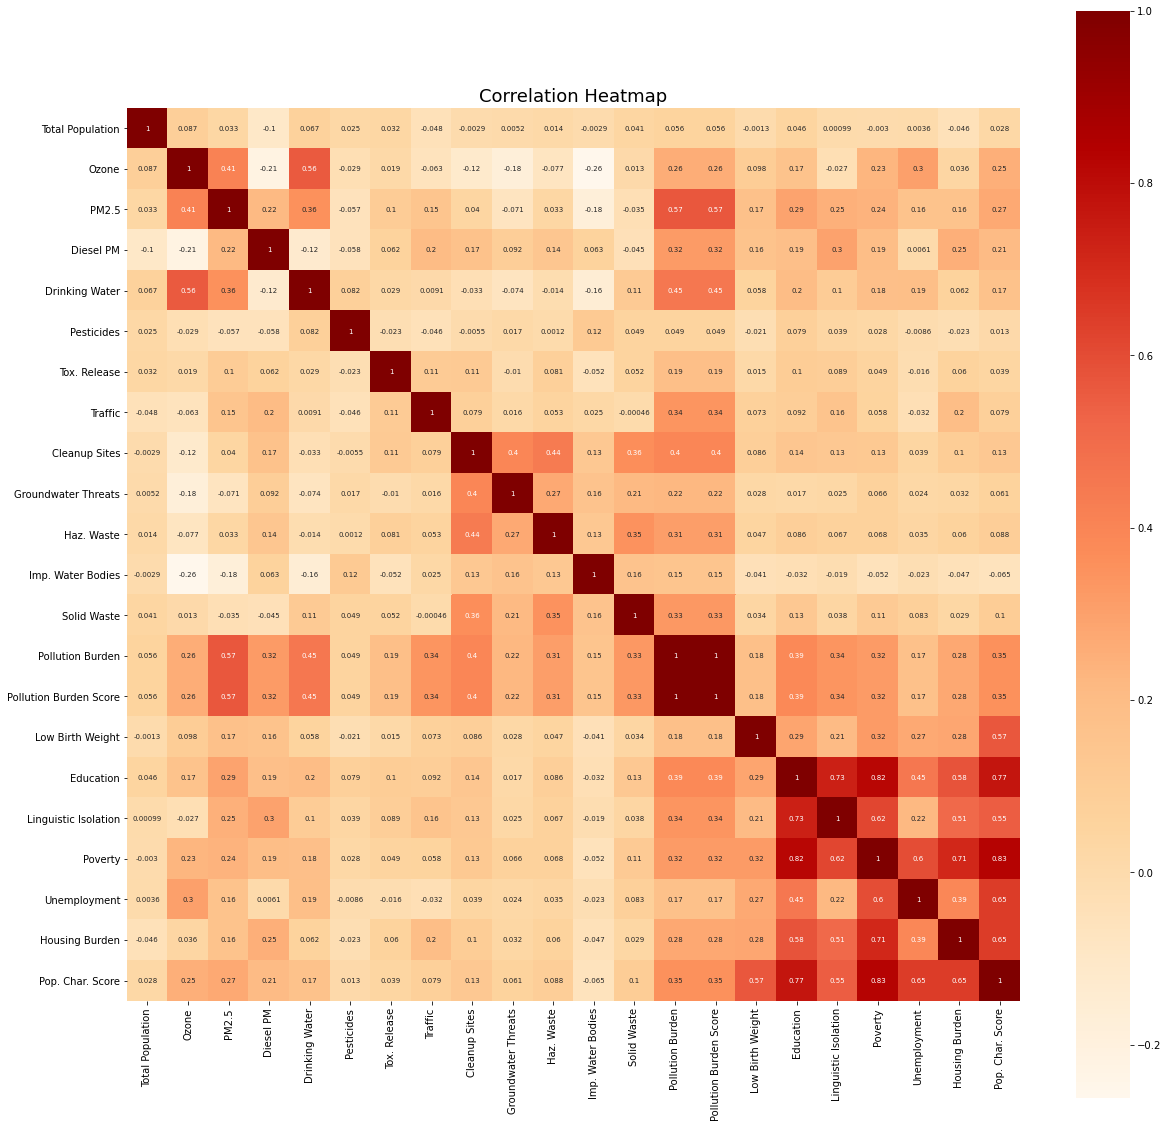

In [12]:
#create correlation heatmap
plt.figure(figsize = (20,20))
sns.heatmap(df3.corr(), cmap = 'OrRd', annot = True, annot_kws={"size":7}, square = True)
plt.title('Correlation Heatmap', fontsize = 18);

The correlation heatmap shows that poverty and education have a score of 0.82, poverty and population characteristic score (Pop. Char. Score) have a correlation of 0.83, and pollution burden and pollution burden score have a score of 1. Therefore, poverty and pollution burden are dropped.

In [13]:
#drop columns
df3.drop(columns = ['Poverty', 'Pollution Burden'], axis = 1, inplace = True)

### Rename Columns

Finally, columms are renamed by making all letters lowercase, removing punction, and removing spaces in order to keep naming consistent between the sets of data and make running models easier.

In [14]:
#rename columns
df3.rename(columns = {'Total Population': 'total_population', 'California County': 'california_county', 
                     'Ozone': 'ozone', 'PM2.5': 'pm2_5', 'SB 535 Disadvantaged Community': 'sb_535_disadvantaged', 
                     'Diesel PM': 'diesel_pm', 'Drinking Water': 'drinking_water', 'Pesticides': 'pesticides', 
                     'Tox. Release': 'tox_release', 'Traffic': 'traffic', 'Cleanup Sites': 'cleanup_sites',  
                     'Groundwater Threats': 'groundwater_threats', 'Haz. Waste': 'haz_waste', 
                     'Imp. Water Bodies': 'imp_water_bodies', 'Solid Waste': 'solid_waste', 
                     'Pollution Burden Score': 'pollution_burden_score', 'Low Birth Weight': 'lbw', 
                     'Education': 'education', 'Linguistic Isolation': 'linguistic_isolation', 
                     'Unemployment': 'unemployment', 'Housing Burden': 'housing_burden', 
                     'Pop. Char. Score': 'Pop. Char. Score'}, inplace = True)

In [15]:
df3.head(2)

,total_population,california_county,sb_535_disadvantaged,ozone,pm2_5,diesel_pm,drinking_water,pesticides,tox_release,traffic,cleanup_sites,groundwater_threats,haz_waste,imp_water_bodies,solid_waste,pollution_burden_score,lbw,education,linguistic_isolation,unemployment,housing_burden,Pop. Char. Score
Census Tract,,,,,,,,,,,,,,,,,,,,,,
6019001100,3174,Fresno,Yes,0.065,15.40,48.524,681.20,2.75,18551.957190,909.14,80.5,45.75,0.795,0,21.75,9.85,7.44,53.3,16.2,17.6,26.0,9.55
6071001600,6133,San Bernardino,Yes,0.062,13.31,38.556,904.66,1.37,7494.236622,782.26,66.2,36.00,1.250,5,12.00,10.00,7.04,53.3,33.4,12.3,34.1,9.07


### Save Cleaned Data

The cleaned data is saved and exported as a csv to be used in future notebooks.

In [16]:
#save as csv
df3.to_csv('data/cleaned/cleaned_ces3')

## Demographic Profile CES 3.0

This is another data set found within the [CalEnviroScreen 3.0 Report](https://oehha.ca.gov/calenviroscreen/report/calenviroscreen-30). This data set is used to look at demographics for each cesus tract.

In [17]:
dp3.head(2)

,CES 3.0 Score,CES 3.0 Percentile,CES 3.0 \nPercentile Range,Total Population,County,Children < 10 (%),Pop 11-64 years (%),Elderly > 65 (%),Hispanic (%),White (%),African American (%),Native American (%),Asian American (%),Other (%)
Census Tract,,,,,,,,,,,,,,
6019001100,94.09,100.00,95-100% (highest scores),3174,Fresno,18.8,73.6,7.6,65.3,4.2,24.6,0.5,3.5,1.8
6071001600,90.68,99.99,95-100% (highest scores),6133,San Bernardino,19.7,76.1,4.2,91.1,5.8,0.7,0.3,1.4,0.7


### Drop Rows and Columns

Drop rows with a total population of 0.

In [18]:
#zero population
dp3[dp3['Total Population'] == 0]

,CES 3.0 Score,CES 3.0 Percentile,CES 3.0 \nPercentile Range,Total Population,County,Children < 10 (%),Pop 11-64 years (%),Elderly > 65 (%),Hispanic (%),White (%),African American (%),Native American (%),Asian American (%),Other (%)
Census Tract,,,,,,,,,,,,,,
6037320000,NaN,NaN,NaN,0,Los Angeles,0.0,100.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
6037980001,NaN,NaN,NaN,0,Los Angeles,0.0,100.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
6037980002,NaN,NaN,NaN,0,Los Angeles,0.0,100.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
6037980005,NaN,NaN,NaN,0,Los Angeles,0.0,100.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
6037980006,NaN,NaN,NaN,0,Los Angeles,0.0,100.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
6037980007,NaN,NaN,NaN,0,Los Angeles,0.0,100.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
6037980020,NaN,NaN,NaN,0,Los Angeles,0.0,100.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
6037980025,NaN,NaN,NaN,0,Los Angeles,0.0,100.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
6037980030,NaN,NaN,NaN,0,Los Angeles,0.0,100.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
#drop rows
dp3.drop([6037980002, 6037980001, 6037980025, 6037320000, 6037980005, 6071980100,
          6037980030, 6037980007, 6037980006, 6081984300, 6037980020], inplace = True)

Columns not specific to the business problem are dropped as well as columns already found in the data set cleaned above.

In [20]:
#drop columns
dp3.drop(columns = [' CES 3.0 Score', 'CES 3.0 Percentile', ' CES 3.0 \nPercentile Range', 
                  'Total Population', 'County'], axis = 1, inplace = True)

### Check For Missing Values

The data set is checked for missing values and missing values are handled appropriately.

In [21]:
#check NaNs
dp3.isna().sum()

Children < 10 (%)       0
Pop 11-64 years (%)     0
Elderly > 65 (%)        0
Hispanic (%)            0
White (%)               0
African American (%)    0
Native American (%)     0
Asian American (%)      0
Other (%)               0
dtype: int64

### Multicollinearity

The data is checked for highly correlated features. Any features with a correlation above 0.8 are removed in order to deal with multicollinearity.

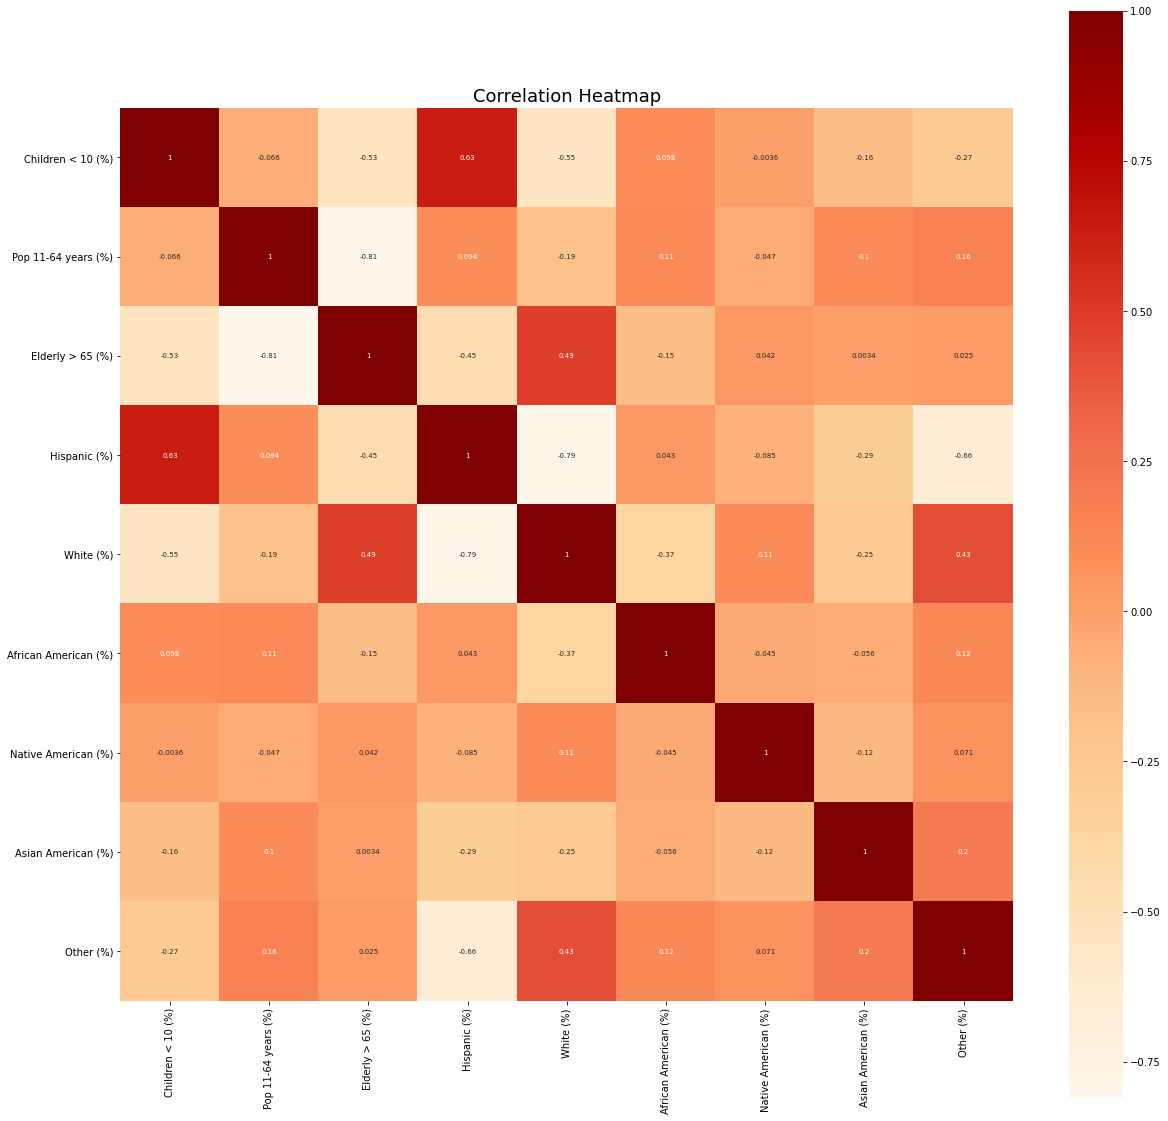

In [22]:
#create correlation heatmap
plt.figure(figsize = (20,20))
sns.heatmap(dp3.corr(), cmap = 'OrRd', annot = True, annot_kws={"size":7}, square = True)
plt.title('Correlation Heatmap', fontsize = 18);

No signs of multicollinearity.

### Rename Columns

Columns are renamed by making all letters lowercase, removing punctuation, and removing spaces in order to make modeling easier.

In [23]:
#rename columns
dp3.rename(columns = {'Census Tract ': 'Census Tract', 'Children < 10 (%)' : 'less_10_yrs', 'Pop 11-64 years (%)' : 'yrs_11_64', 
                    'Elderly > 65 (%)': 'greater_65', 'Hispanic (%)': 'hispanic', 
                    'White (%)': 'white', 'African American (%)': 'african_american', 
                    'Native American (%)': 'native_american', 'Asian American (%)': 'asian_american', 
                    'Other (%)': 'other'}, inplace = True)

### Save Cleaned Data

In [24]:
#save to csv
dp3.to_csv('data/cleaned/cleaned_dp3')

## CalEnviroSreen 2.0 Report (CES 2.0)

The [CalEnviroScreen 2.0 Report](https://oehha.ca.gov/calenviroscreen/report/calenviroscreen-version-20) was published in 2014. This data set is cleaned and the environmental health hazards are added to the CES 3.0 data to use in modeling to see if past levels help achieve accurate predictions. 

In [25]:
df2.head(2)

,Total Population,California County,ZIP,City,Longitude,Latitude,Click for interactive map,CES 2.0 Score,CES 2.0 \nPercentile Range,Hyperlink,Ozone,Ozone Pctl,PM2.5,PM2.5 Pctl,Diesel PM,Diesel PM Pctl,Drinking Water,Drinking Water Pctl,Pesticides,Pesticides Pctl,Tox. Release,Tox. Release Pctl,Traffic,Traffic Pctl,Cleanup Sites,Cleanup Sites Pctl,Groundwater Threats,Groundwater Threats Pctl,Haz. Waste,Haz. Waste Pctl,Imp. Water Bodies,Imp. Water Bodies Pctl,Solid Waste,Solid Waste Pctl,Pollution Burden,Pollution Burden Score,Pollution Burden Pctl,Age,Age Pctl,Asthma,Asthma Pctl,Low Birth Weight,Low Birth Weight Pctl,Education,Education Pctl,Linguistic Isolation,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
Census Tract,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6019001100,3174,Fresno,93706,Fresno,-119.781696,36.709695,Click for map,89.22,96-100% (highest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0.255228,80.87,14.746087,97.83,44.23,93.91,519.88237,83.3,5.470140,53.90,96414.45837,99.81,1217.535680,66.95,85.5,98.86,55.75,85.47,0.52,74.84,0,0.0,5.0,81.49,78.621127,9.530973,99.95,26.4,67.66,130.748821,99.03,0.058025,94.73,55.2,95.60,21.6,83.66,77.500865,97.78,19.3,92.05,90.072268,9.360658,99.6
6019000300,3609,Fresno,93706,Fresno,-119.801035,36.726462,Click for map,83.71,96-100% (highest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0.287130,83.28,14.619618,97.57,46.75,94.76,519.88237,83.3,37.749178,69.58,19637.97210,97.79,666.915834,36.06,23.5,86.17,27.50,68.24,0.16,50.42,0,0.0,1.0,37.88,71.967758,8.724451,99.45,29.9,88.03,132.400000,99.19,0.061233,98.40,47.3,91.05,18.3,78.34,81.204032,98.93,NaN,NaN,92.323243,9.594592,99.9


### Drop Rows and Columns

Drop rows with a total population of 0 as they are not pertinent to the business problem.

In [26]:
#zero population
df2[df2['Total Population'] == 0]

,Total Population,California County,ZIP,City,Longitude,Latitude,Click for interactive map,CES 2.0 Score,CES 2.0 \nPercentile Range,Hyperlink,Ozone,Ozone Pctl,PM2.5,PM2.5 Pctl,Diesel PM,Diesel PM Pctl,Drinking Water,Drinking Water Pctl,Pesticides,Pesticides Pctl,Tox. Release,Tox. Release Pctl,Traffic,Traffic Pctl,Cleanup Sites,Cleanup Sites Pctl,Groundwater Threats,Groundwater Threats Pctl,Haz. Waste,Haz. Waste Pctl,Imp. Water Bodies,Imp. Water Bodies Pctl,Solid Waste,Solid Waste Pctl,Pollution Burden,Pollution Burden Score,Pollution Burden Pctl,Age,Age Pctl,Asthma,Asthma Pctl,Low Birth Weight,Low Birth Weight Pctl,Education,Education Pctl,Linguistic Isolation,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
Census Tract,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6037320000,0,Los Angeles,91608,Universal City,-118.350933,34.138761,Click for map,NaN,NaN,http://oehha.maps.arcgis.com/apps/Viewer/index...,0.053651,54.96,12.036897,70.53,16.78,57.24,NaN,NaN,0.000000,0.00,586.038054,58.59,7952.287062,99.95,30.00,90.27,20.00,58.79,1.050,86.84,6,63.56,2.00,58.45,61.203809,7.419566,94.21,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6037980001,0,Los Angeles,91505,Burbank,-118.357536,34.199716,Click for map,NaN,NaN,http://oehha.maps.arcgis.com/apps/Viewer/index...,0.124695,67.62,11.520989,66.05,27.92,78.14,NaN,NaN,0.000000,0.00,371.262677,51.66,785.521742,45.42,24.85,87.36,395.75,99.43,1.345,89.11,6,63.56,0.40,14.19,57.143487,6.927264,88.86,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6037980002,0,Los Angeles,90745,Carson,-118.238671,33.810408,Click for map,NaN,NaN,http://oehha.maps.arcgis.com/apps/Viewer/index...,0.000000,0.00,11.663831,67.35,42.33,93.12,NaN,NaN,0.060899,18.10,24122.749040,98.19,1994.497103,80.55,95.45,99.10,293.25,98.86,22.735,99.96,22,99.45,15.70,97.77,71.162230,8.626743,99.23,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6037980005,0,Los Angeles,90501,Torrance,-118.327339,33.853459,Click for map,NaN,NaN,http://oehha.maps.arcgis.com/apps/Viewer/index...,0.000000,0.00,12.101224,71.16,27.32,77.52,NaN,NaN,0.307395,29.43,15161.513650,96.87,1347.883662,70.40,74.30,98.33,132.25,95.87,13.275,99.61,0,0.00,1.20,39.29,60.226241,7.301006,92.96,NaN,NaN,0.0,0.0,0.051174,55.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6037980006,0,Los Angeles,90808,Long Beach,-118.086379,33.814394,Click for map,NaN,NaN,http://oehha.maps.arcgis.com/apps/Viewer/index...,0.002249,11.33,11.509578,65.99,25.02,74.09,NaN,NaN,0.980949,39.22,10590.302180,94.59,3634.316134,95.02,4.00,39.52,5.50,24.28,0.500,73.80,22,99.45,1.00,37.88,60.907485,7.383562,93.89,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6037980007,0,Los Angeles,90803,Long Beach,-118.100741,33.766304,Click for map,NaN,NaN,http://oehha.maps.arcgis.com/apps/Viewer/index...,0.000360,2.41,10.924552,60.95,59.35,97.70,NaN,NaN,0.004587,6.28,15442.423220,96.93,1173.496835,65.70,22.50,85.40,21.40,60.52,0.610,78.97,16,97.27,9.00,92.59,63.217828,7.663717,95.69,NaN,NaN,0.0,0.0,0.051109,54.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6037980020,0,Los Angeles,91352,Sun Valley,-118.303403,34.226689,Click for map,NaN,NaN,http://oehha.maps.arcgis.com/apps/Viewer/index...,0.156875,72.00,11.368330,64.54,12.71,45.81,NaN,NaN,0.000000,0.00,421.273583,53.96,2738.142922,88.59,3.20,33.20,18.00,55.59,0.030,14.56,6,63.56,0.80,27.03,49.631774,6.016729,73.71,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6037980025,0,Los Angeles,90745,Carson,-118.240029,33.843375,Click for map,NaN,NaN,http://oehha.maps.arcgis.com/apps/Viewer/index...,0.000000,0.00,11.954759,69.79,37.11,90.40,NaN,NaN,0.092252,20.49,12144.201030,95.74,808.609849,47.21,65.25,97.70,213.70,98.06,5.335,97.54,24,99.60,5.20,82.10,66.015738,8.002909,97.36,NaN,NaN,0.0,0.0,0.050721,48.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6037980030,0,Los Angeles,90245,El Segundo,-1

In [27]:
#drop rows
df2.drop([6037980002, 6037980001, 6037980025, 6037320000, 6037980005, 6071980100,
          6037980030, 6037980007, 6037980006, 6081984300, 6037980020], inplace = True)

Columns that do not reflect previous environmental health hazard or LBW information and dropped.

In [28]:
#drop columns
df2.drop(columns = ['Total Population', 'California County', 'ZIP', 'City', 'Longitude', 'Latitude', 'Click for interactive map', 
                   'CES 2.0 Score', 'CES 2.0 \nPercentile Range', 'Hyperlink', 'Ozone Pctl', 'PM2.5 Pctl', 
                   'Diesel PM Pctl', 'Drinking Water Pctl', 'Pesticides Pctl', 'Tox. Release Pctl', 'Traffic Pctl', 
                   'Cleanup Sites Pctl', 'Groundwater Threats Pctl', 'Haz. Waste Pctl', 'Imp. Water Bodies Pctl', 
                   'Solid Waste Pctl', 'Pollution Burden', 'Pollution Burden Pctl', 'Age', 'Age Pctl', 
                   'Asthma', 'Asthma Pctl', 'Low Birth Weight Pctl', 'Education Pctl', 'Linguistic Isolation Pctl', 
                   'Poverty', 'Poverty Pctl', 'Unemployment Pctl', 'Pop. Char. ', 'Pop. Char. Pctl', 
                   'Education', 'Linguistic Isolation', 'Unemployment', 'Pop. Char. Score'], axis = 1, inplace = True)

In [29]:
df2.shape

(8024, 14)

### Check For Missing Values

The data is checked for missing values, and all missing values are handled. 

In [30]:
df2.isna().sum()

Ozone                     65
PM2.5                     91
Diesel PM                  0
Drinking Water            24
Pesticides                 0
Tox. Release              12
Traffic                    0
Cleanup Sites              0
Groundwater Threats        0
Haz. Waste                 0
Imp. Water Bodies          0
Solid Waste                0
Pollution Burden Score     0
Low Birth Weight          33
dtype: int64

**Low Birth Weight**

Low birth weight values are dropped, for the same reasons they were dropped with the CES 3.0 report.

In [31]:
#drop LBW NaNs
df2.dropna(subset=['Low Birth Weight'], inplace = True)

In [32]:
df2.shape

(7991, 14)

While looking at the the low birth weight column, the values are noted to be off by two decimals. Therefore, the values are multiplied by 100 in order to match the format in the CES 3.0 report.

In [33]:
#change LBW 
df2['Low Birth Weight']= np.where(df2['Low Birth Weight'] != 0, df2['Low Birth Weight'] * 100, df2['Low Birth Weight'])

**Remaining Missing Values**

The missing values are imputed using the mean for the same reasons as they were imputed in the CES 3.0 report above.

In [34]:
#Ozone
df2['Ozone'] = df2['Ozone'].fillna(df2['Ozone'].mean())

#PM2.5 
df2['PM2.5'] = df2['PM2.5'].fillna(df2['PM2.5'].mean())

#Drinking Water
df2['Drinking Water'] = df2['Drinking Water'].fillna(df2['Drinking Water'].mean())

#Tox. Release
df2['Tox. Release'] = df2['Tox. Release'].fillna(df2['Tox. Release'].mean())

### Multicollinearity

The data is checked for highly correlated features. Any features with a correlation above 0.8 are removed in order to deal with multicollinearity.

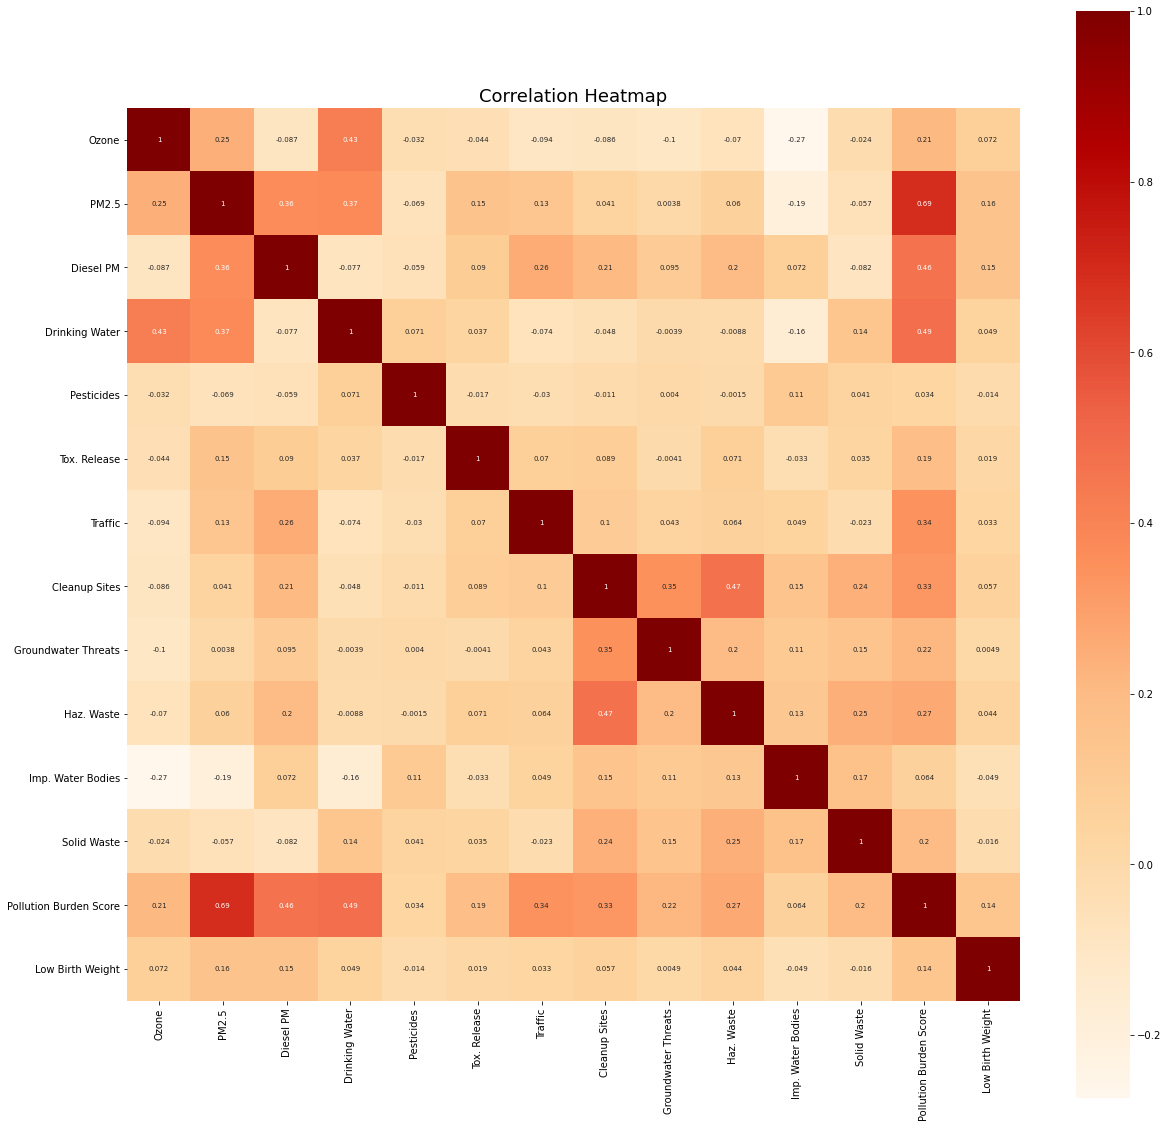

In [36]:
plt.figure(figsize = (20,20))
sns.heatmap(df2.corr(), cmap = 'OrRd', annot = True, annot_kws={"size":7}, square = True)
plt.title('Correlation Heatmap', fontsize = 18);

No signs of multicollinearity.

### Rename Columns


Columms are renamed in order to keep naming consistent as in the above data sets. Additionally, a prefix is added to each column to indicate these column values are from the previous report, CES 2.0.

In [37]:
df2.rename(columns = {'Ozone': 'prev_ozone', 'PM2.5': 'prev_pm2_5', 
                     'Diesel PM': 'prev_diesel_pm', 'Drinking Water': 'prev_drinking_water', 
                     'Pesticides': 'prev_pesticides', 'Low Birth Weight': 'prev_lbw', 
                     'Tox. Release': 'prev_tox_release', 'Traffic': 'prev_traffic', 'Cleanup Sites': 'prev_cleanup_sites',  
                     'Groundwater Threats': 'prev_groundwater_threats', 'Haz. Waste': 'prev_haz_waste', 
                     'Imp. Water Bodies': 'prev_imp_water_bodies', 'Solid Waste': 'prev_solid_waste', 
                     'Pollution Burden Score': 'prev_pollution_burden_score'}, inplace = True)

In [38]:
df2.head(2)

,prev_ozone,prev_pm2_5,prev_diesel_pm,prev_drinking_water,prev_pesticides,prev_tox_release,prev_traffic,prev_cleanup_sites,prev_groundwater_threats,prev_haz_waste,prev_imp_water_bodies,prev_solid_waste,prev_pollution_burden_score,prev_lbw
Census Tract,,,,,,,,,,,,,,
6019001100,0.255228,14.746087,44.23,519.88237,5.470140,96414.45837,1217.535680,85.5,55.75,0.52,0,5.0,9.530973,5.80253
6019000300,0.287130,14.619618,46.75,519.88237,37.749178,19637.97210,666.915834,23.5,27.50,0.16,0,1.0,8.724451,6.12328


### Save Cleaned Data

The cleaned data is saved and exported as a csv to be used in future notebooks.

In [39]:
df2.to_csv('data/cleaned/cleaned_ces2')

## Merge Cleaned Data Sets

The three data sets are merged into one and saved to continue the project.

In [40]:
#merge CES 3.0 data
ces3 = pd.merge(df3, dp3, left_index = True, right_index = True)

In [41]:
#merge with CES 2.0 data
df18 = pd.merge(ces3, df2, left_index = True, right_index = True)

### Save Merged Data

In [44]:
df18.to_csv('data/merged/df18')